## Purpose: Model Comparison

Demonstration: 
    1. Parameter fit
    2. Use of Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

y = ym + sig * numpy.random.randn( N )


Fit polynomial models of increasing degree. Calculate the evidence to see which one is the best model.

Polynomial degree  0   blue
Fit params           3.236
    stdev            0.826
    chisq          286.860
    evidence       -29.794
Polynomial degree  1   green
Fit params       [    2.148    2.176]
    stdev        [    0.405    0.254]
    chisq           59.030
    evidence       -25.441
Polynomial degree  2   red
Fit params       [    0.650    1.442    0.734]
    stdev        [    0.257    0.146    0.087]
    chisq           11.865
    evidence       -21.803
Polynomial degree  3   mint
Fit params       [    1.186    0.509    0.317    0.278]
    stdev        [    0.033    0.031    0.015    0.008]
    chisq            0.152
    evidence        -8.801
Polynomial degree  4   magenta
Fit params       [    1.185    0.507    0.319    0.278   -0.000]
    stdev        [    0.038    0.045    0.031    0.014    0.006]
    chisq            0.152
    evidence       -12.938
Polynomial degree  5   yellow
Fit params       [    1.192    0.498    0.303    0.286    0.004   -0.002]
    stdev        

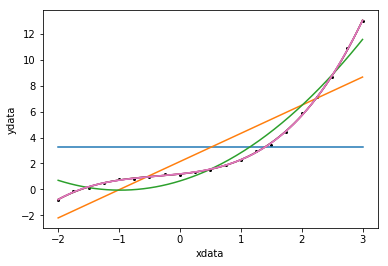

In [4]:
plotFit( x, y, show=False )
yy = numpy.zeros( 7, dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
for deg in range( 7 ) :
    poly = PolynomialModel( deg )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly )
    param = fitter.fit( y )
    plt.plot( xi, poly( xi ) )

    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
    print( "Polynomial degree  %d  " % (np-1), col[deg] )
    print( "Fit params      ", fmt( param, max=None ) )
    print( "    stdev       ", fmt( stdev, max=None ) ) 
    print( "    chisq       ", fmt( chisq ) )
    print( "    evidence    ", fmt( logpr ) )
    yy[deg] = logpr
plt.show()

Plot the evidence as function of the polynomial degree.

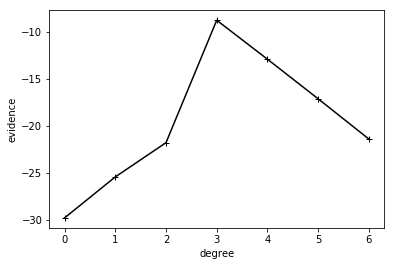

In [5]:
plt.plot( yy, 'k-+' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.show()